# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Iago Rainha Mendes </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import *

In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
df.columns = ['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'MagnitudeType', 'MagnitudeError', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'MagnitudeType', 'MagnitudeError', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,MagnitudeType,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [4]:
coluna_hemisferio = pd.cut(df.Latitude, bins=[-90,0,90], labels=["Sul","Norte"])
df["Hemisfério"] = coluna_hemisferio

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

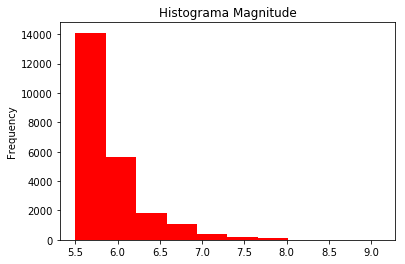

In [5]:
df["Magnitude"].plot(kind="hist", color=("red"))
plt.title("Histograma Magnitude")

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [21]:
a, b = expon.fit(df.Magnitude)
#loc = ponto inicial da função     /   scale = define a angulação da exponencial
print(a, b)

5.49999999967 0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

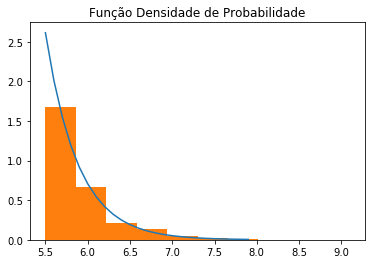

In [46]:
plt.plot(np.arange(5.5,8,0.1), expon.pdf(np.arange(5.5,8,0.1), loc=a, scale=b))
plt.hist(df.Magnitude, normed=True)
plt.title("Função Densidade de Probabilidade")

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [8]:
tabela_q3 = pd.crosstab(df.Type, df.Hemisfério, normalize =True)*100
tabela_q3

Hemisfério,Sul,Norte
Type,,
Earthquake,54.519050,44.712113
Explosion,0.008543,0.008543
Nuclear Explosion,0.119597,0.627883
Rock Burst,0.004271,0.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [33]:
terremotos_norte = len(df.loc[(df["Hemisfério"] == "Norte")&(df["Type"] == "Earthquake")])
terremotos_totais = len(df[df["Type"]=="Earthquake"])
prob = terremotos_norte/terremotos_totais

print("A probabilidade de ocorrer um terremoto no hemisfério norte é {0}%" .format(prob*100))

A probabilidade de ocorrer um terremoto no hemisfério norte é 45.05853994490358%


Explique o seu raciocínio


A probabilidade de ocorrer um terremoto no hemisferio norte é igual ao total de terremotos ocorridos no hemisferio norte dividido pelo total de terremotos

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [35]:
probabilidade_hems = df.groupby('Hemisfério').size().div(len(df))
dfq3 = df.groupby(['Type', 'Hemisfério']).size().div(len(df)).div(probabilidade_hems, axis=0, level='Hemisfério')

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [42]:
print((dfq3.loc[("Nuclear Explosion"),("Norte")]/terremotos_norte)*100,'%')

0.000132267091419 %


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

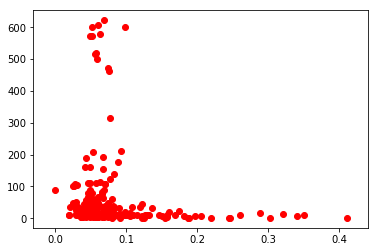

In [48]:
plt.scatter(df.MagnitudeError, df.Depth, c='red')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [55]:
print("Correlação entre Magnitude Error e Depth:", df.MagnitudeError.corr(df.Depth))

Correlação entre Magnitude Error e Depth: -0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

O valor negativo e distante de 1, nos mostra que as duas variaveis, além de terem uma proporcinalidade negativa, tem pouca correlação (devido à distância do número até 1). 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [14]:
dados = df.loc[:,["Latitude","Longitude"]]
dados.describe()

,Latitude,Longitude
count,23412.000000,23412.000000
mean,1.679033,39.639961
std,30.113183,125.511959
min,-77.080000,-179.997000
25%,-18.653000,-76.349750
50%,-3.568500,103.982000
75%,26.190750,145.026250
max,86.005000,179.998000


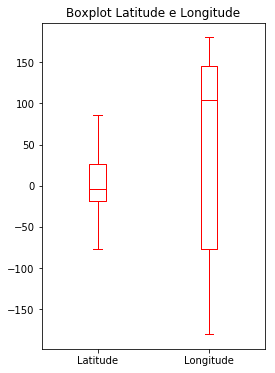

In [15]:
dados.plot(kind='box', figsize=(4,6), title="Boxplot Latitude e Longitude", color="red")

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [16]:
types = df[(df.MagnitudeType == "MB") & (df.Type == "Nuclear Explosion")]
pct = (types.Hemisfério.value_counts(normalize=True, sort=False))
pct

Sul      0.171779
Norte    0.828221
Name: Hemisfério, dtype: float64

É mais provável que tenha sido no norte